<a href="https://colab.research.google.com/github/Diogoa83/Algoritmo-Naive-Bayes/blob/main/PREVIS%C3%83O_DE_POSSIVEIS_CLIENTES_QUE_DEIXARAM_DE_USAR_O_CARTAO_DE_CREDITO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import math as mt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm


In [ ]:
!pip install plotly --upgrade 

In [ ]:
# LENDO ARQUIVO
dados = pd.read_csv('BankChurners.csv')
dados

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
# EXCLUINDO AS DUAS ULTIMAS LINHAS DO DATAFRAME
df = pd.DataFrame(dados)
dados.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Contacts_Count_12_mon'], axis=1, inplace=True)
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
# alterando os nomes das colunas TRADUZINDO COLUNAS
dados.rename(columns={'CLIENTNUM': 'NumCliente', 'Attrition_Flag': 'Atividade do Cliente', 'Customer_Age': 'Idade', 'Gender': 'Genero', 'Dependent_count': 'Dependentes', 'Education_Level': 'Escolaridade', 'Marital_Status': 'Estado Civil', 'Income_Category': 'Renda', 'Card_Category': 'Tipo Cartão', 'Months_on_book': 'Temp. Relac. Banco(meses)', 'Credit_Limit': 'Limite Cartão', 'Total_Revolving_Bal': 'Rotativo Total', 'Avg_Open_To_Buy': 'Fatura', 'Total_Trans_Amt': 'Uso em 12 meses', 'Total_Trans_Ct': 'Total transações', 'Avg_Utilization_Ratio': 'Taxa de utilização', 'Total_Relationship_Count': 'Produtos de Relacionamento', 'Months_Inactive_12_mon': 'Meses Inativos'}, inplace=True)

In [ ]:
dados['Atividade do Cliente'] = dados['Atividade do Cliente'].map({'Existing Customer': 'Cliente Ativo', 'Attrited Customer': 'Cliente Inativo'})
dados['Genero'] = dados['Genero'].map({'M': 'Masculino', 'F': 'Feminino'})
dados['Escolaridade'] = dados['Escolaridade'].map({'Graduate': 'Graduação', 'High School': 'Ensino Medio', 'Unknown': 'Desconhecido', 'Uneducated': 'Sem Escolaridade', 'College': 'Colegial', 'Post-Graduate': 'Pos Graduação', 'Doctorate': 'Doutorado'})
dados['Estado Civil'] = dados['Estado Civil'].map({'Married': 'Casado', 'Single': 'Solteiro', 'Unknown': 'Não respondeu', 'Divorced': 'Divorciado'})
dados['Renda'] = dados['Renda'].map({'Less than $40K': '30000', '$40K - $60K': '50000', '$80K - $120K': '100000', '$60K - $80K': '70000', 'Unknown': '35000', '$120K +': '120000' })
dados['Tipo Cartão'] = dados['Tipo Cartão'].map({'Blue': 'Standard', 'Silver': 'Prata', 'Gold': 'Ouro', 'Platinum': 'Platina'})
# NOSSA COLUNA RENDA/LIMITE CARTAO/FATURA ESTAVAM RECONHECIDAS EM NOSSA TABELA COMO OBJETO, AQUI ESTAMOS TRANSFORMANDO EM NUMEROS INTEIROS
dados['Renda'] = dados['Renda'].astype(int)
dados['Limite Cartão'] = dados['Limite Cartão'].astype(int)
dados['Fatura'] = dados['Fatura'].astype(int)

In [ ]:
dados

,NumCliente,Atividade do Cliente,Idade,Genero,Dependentes,Escolaridade,Estado Civil,Renda,Tipo Cartão,Temp. Relac. Banco(meses),Produtos de Relacionamento,Meses Inativos,Limite Cartão,Rotativo Total,Fatura,Uso em 12 meses,Total transações,Taxa de utilização
0,768805383,Cliente Ativo,45,Masculino,3,Ensino Medio,Casado,70000,Standard,39,5,1,12691,777,11914,1144,42,0.061
1,818770008,Cliente Ativo,49,Feminino,5,Graduação,Solteiro,30000,Standard,44,6,1,8256,864,7392,1291,33,0.105
2,713982108,Cliente Ativo,51,Masculino,3,Graduação,Casado,100000,Standard,36,4,1,3418,0,3418,1887,20,0.000
3,769911858,Cliente Ativo,40,Feminino,4,Ensino Medio,Não respondeu,30000,Standard,34,3,4,3313,2517,796,1171,20,0.760
4,709106358,Cliente Ativo,40,Masculino,3,Sem Escolaridade,Casado,70000,Standard,21,5,1,4716,0,4716,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Cliente Ativo,50,Masculino,2,Graduação,Solteiro,50000,Standard,40,3,2,4003,1851,2152,15476,117,0.462
10123,710638233,Cliente Inativo,41,Masculino,2,Desconhecido,Divorciado,50000,Standard,25,4,2,4277,2186,2091,8764,69,0.511
10124,716506083,Cliente Inativo,44,Feminino,1,Ensino Medio,Casado,30000,Standard,36,5,3,5409,0,5409,10291,60,0.000
10125,717406983,Cliente Inativo,30,Masculino,2,Graduação,Não respondeu,50000,Standard,36,4,3,5281,0,5281,8395,62,0.000


## UTILIZANDO O ALGORITIMO NAIVE BAYES E ARVORE DE DECISÃO NA BASE DE DADOS CARTAO DE CREDITO

In [ ]:
# PARÂMETROS

# 'Atividade do Cliente', 'Idade', 'Genero', 'Estado Civil', 'Renda', 
# 'Rotativo Total', 'Fatura',
# 'Uso em 12 meses', 'Total transações', 'Taxa de utilização'

In [ ]:
previ = dados[['Atividade do Cliente', 'Idade', 'Renda', 
               'Rotativo Total','Uso em 12 meses', 'Fatura','Genero','Estado Civil', 
               'Total transações', 'Taxa de utilização']]

In [ ]:
previ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Atividade do Cliente  10127 non-null  object 
 1   Idade                 10127 non-null  int64  
 2   Renda                 10127 non-null  int32  
 3   Rotativo Total        10127 non-null  int64  
 4   Uso em 12 meses       10127 non-null  int64  
 5   Fatura                10127 non-null  int32  
 6   Genero                10127 non-null  object 
 7   Estado Civil          10127 non-null  object 
 8   Total transações      10127 non-null  int64  
 9   Taxa de utilização    10127 non-null  float64
dtypes: float64(1), int32(2), int64(4), object(3)
memory usage: 712.2+ KB


In [ ]:
previ.isnull().sum()

Atividade do Cliente    0
Idade                   0
Renda                   0
Rotativo Total          0
Uso em 12 meses         0
Fatura                  0
Genero                  0
Estado Civil            0
Total transações        0
Taxa de utilização      0
dtype: int64

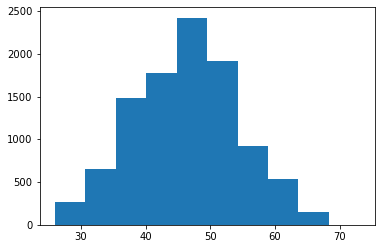

In [ ]:
plt.hist(x=previ['Idade']);

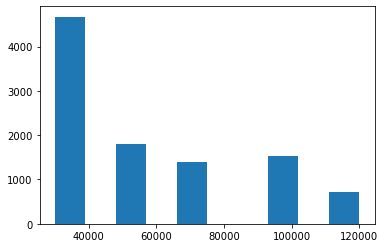

In [ ]:
plt.hist(x=previ['Renda']);

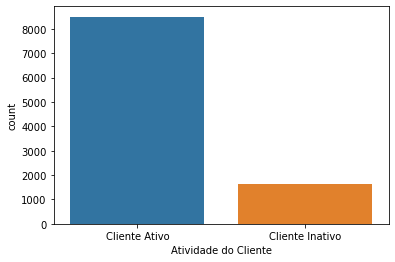

In [ ]:
sns.countplot(x=previ['Atividade do Cliente']);

In [ ]:
previ['Taxa de utilização'] = previ['Taxa de utilização'].astype(int)


C:\Users\diogo\AppData\Local\Temp/ipykernel_12240/1108569547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previ['Taxa de utilização'] = previ['Taxa de utilização'].astype(int);


In [ ]:
previ

,Atividade do Cliente,Idade,Renda,Rotativo Total,Uso em 12 meses,Fatura,Genero,Estado Civil,Total transações,Taxa de utilização
0,Cliente Ativo,45,70000,777,1144,11914,Masculino,Casado,42,0
1,Cliente Ativo,49,30000,864,1291,7392,Feminino,Solteiro,33,0
2,Cliente Ativo,51,100000,0,1887,3418,Masculino,Casado,20,0
3,Cliente Ativo,40,30000,2517,1171,796,Feminino,Não respondeu,20,0
4,Cliente Ativo,40,70000,0,816,4716,Masculino,Casado,28,0
...,...,...,...,...,...,...,...,...,...,...
10122,Cliente Ativo,50,50000,1851,15476,2152,Masculino,Solteiro,117,0
10123,Cliente Inativo,41,50000,2186,8764,2091,Masculino,Divorciado,69,0
10124,Cliente Inativo,44,30000,0,10291,5409,Feminino,Casado,60,0
10125,Cliente Inativo,30,50000,0,8395,5281,Masculino,Não respondeu,62,0


In [ ]:
previ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Atividade do Cliente  10127 non-null  object
 1   Idade                 10127 non-null  int64 
 2   Renda                 10127 non-null  int32 
 3   Rotativo Total        10127 non-null  int64 
 4   Uso em 12 meses       10127 non-null  int64 
 5   Fatura                10127 non-null  int32 
 6   Genero                10127 non-null  object
 7   Estado Civil          10127 non-null  object
 8   Total transações      10127 non-null  int64 
 9   Taxa de utilização    10127 non-null  int32 
dtypes: int32(3), int64(4), object(3)
memory usage: 672.6+ KB


## DIVIDINDO OS DADOS

In [ ]:
X_credit = previ.iloc[:, 1:11]
y_credit = previ.iloc[:,0]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
import category_encoders as ce
from category_encoders import OneHotEncoder

In [ ]:
onehot = pd.get_dummies(data=X_credit, columns=['Estado Civil', 'Genero'])
onehot

,Idade,Renda,Rotativo Total,Uso em 12 meses,Fatura,Total transações,Taxa de utilização,Estado Civil_Casado,Estado Civil_Divorciado,Estado Civil_Não respondeu,Estado Civil_Solteiro,Genero_Feminino,Genero_Masculino
0,45,70000,777,1144,11914,42,0,1,0,0,0,0,1
1,49,30000,864,1291,7392,33,0,0,0,0,1,1,0
2,51,100000,0,1887,3418,20,0,1,0,0,0,0,1
3,40,30000,2517,1171,796,20,0,0,0,1,0,1,0
4,40,70000,0,816,4716,28,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,50000,1851,15476,2152,117,0,0,0,0,1,0,1
10123,41,50000,2186,8764,2091,69,0,0,1,0,0,0,1
10124,44,30000,0,10291,5409,60,0,1,0,0,0,1,0
10125,30,50000,0,8395,5281,62,0,0,0,1,0,0,1


In [ ]:
X_credit = onehot.values

In [ ]:
X_credit[:,]

array([[    45,  70000,    777, ...,      0,      0,      1],
       [    49,  30000,    864, ...,      1,      1,      0],
       [    51, 100000,      0, ...,      0,      0,      1],
       ...,
       [    44,  30000,      0, ...,      0,      1,      0],
       [    30,  50000,      0, ...,      0,      0,      1],
       [    43,  30000,   1961, ...,      0,      1,      0]], dtype=int64)

In [ ]:
y_credit

0          Cliente Ativo
1          Cliente Ativo
2          Cliente Ativo
3          Cliente Ativo
4          Cliente Ativo
              ...       
10122      Cliente Ativo
10123    Cliente Inativo
10124    Cliente Inativo
10125    Cliente Inativo
10126    Cliente Inativo
Name: Atividade do Cliente, Length: 10127, dtype: object

## ESCALONAR

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credito = StandardScaler()
X_credit = scaler_credito.fit_transform(X_credit)

In [ ]:
X_credit

array([[-0.16540558,  0.44193931, -0.47342222, ..., -0.79850685,
        -1.05995565,  1.05995565],
       [ 0.33357038, -0.88650218, -0.36666682, ...,  1.2523374 ,
         0.9434357 , -0.9434357 ],
       [ 0.58305837,  1.43827042, -1.42685834, ..., -0.79850685,
        -1.05995565,  1.05995565],
       ...,
       [-0.29014957, -0.88650218, -1.42685834, ..., -0.79850685,
         0.9434357 , -0.9434357 ],
       [-2.03656544, -0.22228144, -1.42685834, ..., -0.79850685,
        -1.05995565,  1.05995565],
       [-0.41489356, -0.88650218,  0.97943283, ..., -0.79850685,
         0.9434357 , -0.9434357 ]])

## CRIANDO TREINAMENTO DO ALGORITIMO NAIVE BAYES

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split\
(X_credit, y_credit, test_size= 0.20, random_state = 0) 

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((8101, 13), (8101,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((2026, 13), (2026,))

## PREVISÃO

In [ ]:
# IMPORTANDO A BIBLIOTECA GAUSSIAN
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
naive_credit = GaussianNB()
naive_credit.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [ ]:
previsões = naive_credit.predict(X_credit_teste)
previsões

array(['Cliente Ativo', 'Cliente Ativo', 'Cliente Ativo', ...,
       'Cliente Ativo', 'Cliente Ativo', 'Cliente Ativo'], dtype='<U15')

In [ ]:
y_credit_teste

3358      Cliente Ativo
9951    Cliente Inativo
3848      Cliente Ativo
1666      Cliente Ativo
8383      Cliente Ativo
             ...       
9982      Cliente Ativo
2872      Cliente Ativo
4424    Cliente Inativo
7470      Cliente Ativo
9651      Cliente Ativo
Name: Atividade do Cliente, Length: 2026, dtype: object

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(previsões, y_credit_teste)

0.8770977295162883

                 precision    recall  f1-score   support

  Cliente Ativo       0.94      0.92      0.93      1756
Cliente Inativo       0.53      0.61      0.57       270

       accuracy                           0.88      2026
      macro avg       0.74      0.76      0.75      2026
   weighted avg       0.88      0.88      0.88      2026



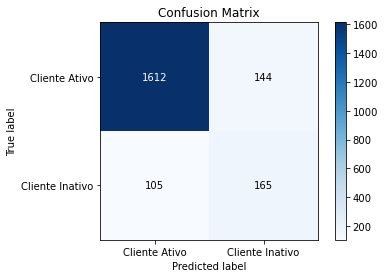

In [ ]:
skplt.metrics.plot_confusion_matrix(previsões, y_credit_teste)
print(classification_report(previsões, y_credit_teste))

## CRIANDO TREINAMENTO DO ALGORITIMO ARVORE DE DECISÃO


In [ ]:
import scikitplot as skplt

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', max_depth=None,\
max_features = None, min_samples_leaf = 1, min_samples_split = 5, random_state=0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5, random_state=0)

In [ ]:
previsoes_arvore = arvore_credit.predict(X_credit_teste)

In [ ]:
accuracy_score(previsoes_arvore, y_credit_teste)

0.9244817374136229

                 precision    recall  f1-score   support

  Cliente Ativo       0.95      0.96      0.96      1704
Cliente Inativo       0.77      0.74      0.76       322

       accuracy                           0.92      2026
      macro avg       0.86      0.85      0.86      2026
   weighted avg       0.92      0.92      0.92      2026



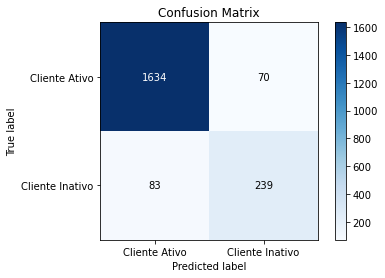

In [ ]:
skplt.metrics.plot_confusion_matrix(previsoes_arvore, y_credit_teste)
print(classification_report(previsoes_arvore, y_credit_teste))

In [ ]:
arvore_credit.classes_

array(['Cliente Ativo', 'Cliente Inativo'], dtype=object)

In [ ]:
!fig

'fig' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


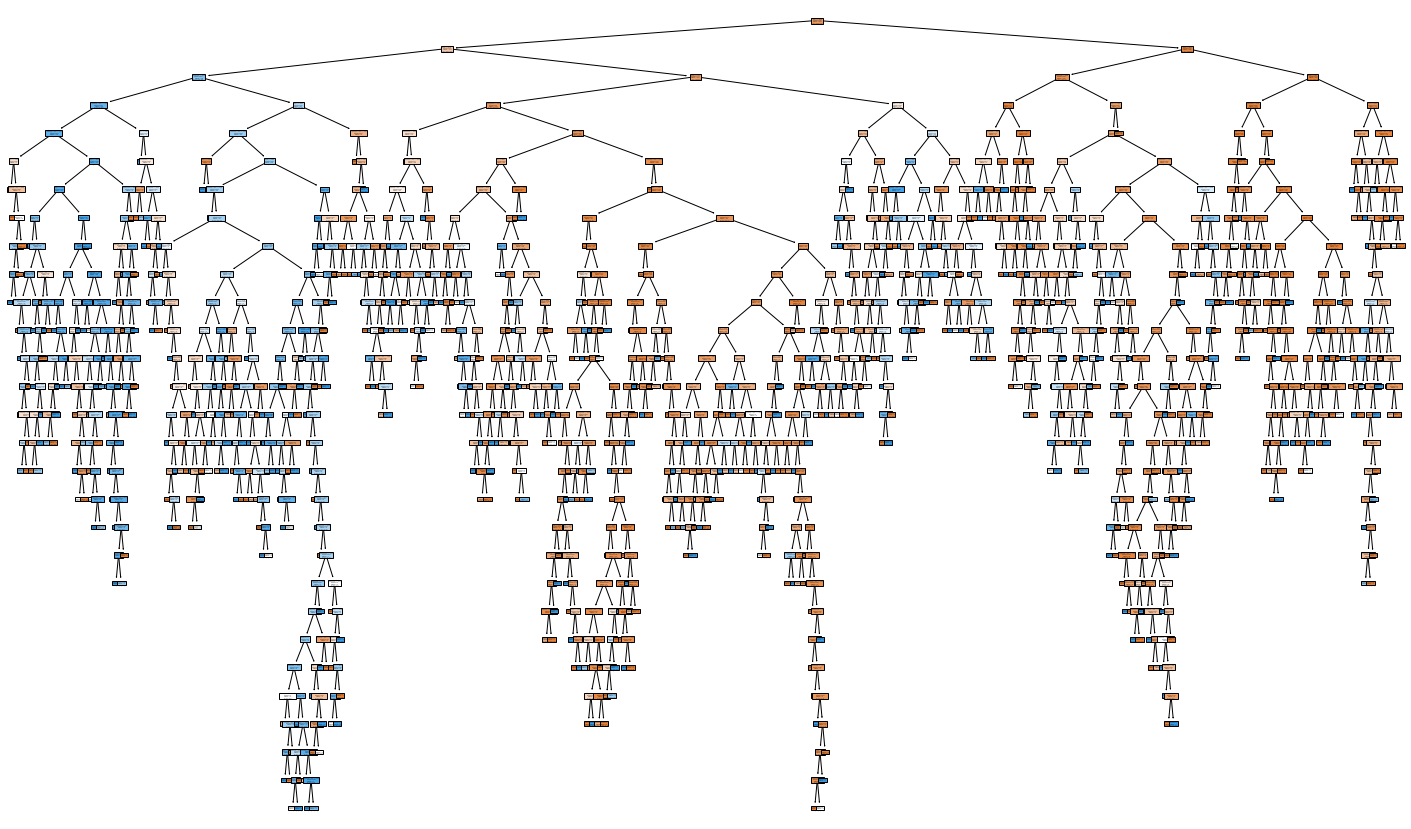

In [ ]:
from sklearn import tree
prevs = ['Atividade do Cliente', 'Idade', 'Renda', 
               'Rotativo Total', 'Fatura', 'Total transações', 'Taxa de utilização']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(25,15))
tree.plot_tree(arvore_credit, feature_names=prevs,filled=True);



## RANDON FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [ ]:
!pip install scikit-plot

In [ ]:
randon_florest_credit = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None,\
max_features = None, min_samples_leaf = 1, min_samples_split = 5, random_state=0)

randon_florest_credit.fit(X_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', max_features=None,
                       min_samples_split=5, random_state=0)

In [ ]:
random_previsor = randon_florest_credit.predict(X_credit_teste)
random_previsor

array(['Cliente Ativo', 'Cliente Inativo', 'Cliente Ativo', ...,
       'Cliente Inativo', 'Cliente Ativo', 'Cliente Ativo'], dtype=object)

In [ ]:
accuracy_score(random_previsor, y_credit_teste)

0.9501480750246791

                 precision    recall  f1-score   support

  Cliente Ativo       0.98      0.96      0.97      1754
Cliente Inativo       0.78      0.88      0.83       272

       accuracy                           0.95      2026
      macro avg       0.88      0.92      0.90      2026
   weighted avg       0.95      0.95      0.95      2026



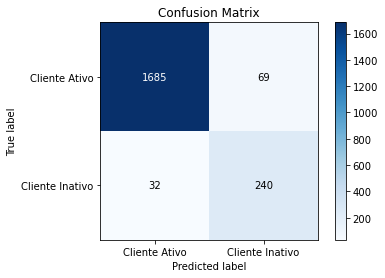

In [ ]:
skplt.metrics.plot_confusion_matrix(random_previsor, y_credit_teste)
print(classification_report(random_previsor, y_credit_teste))

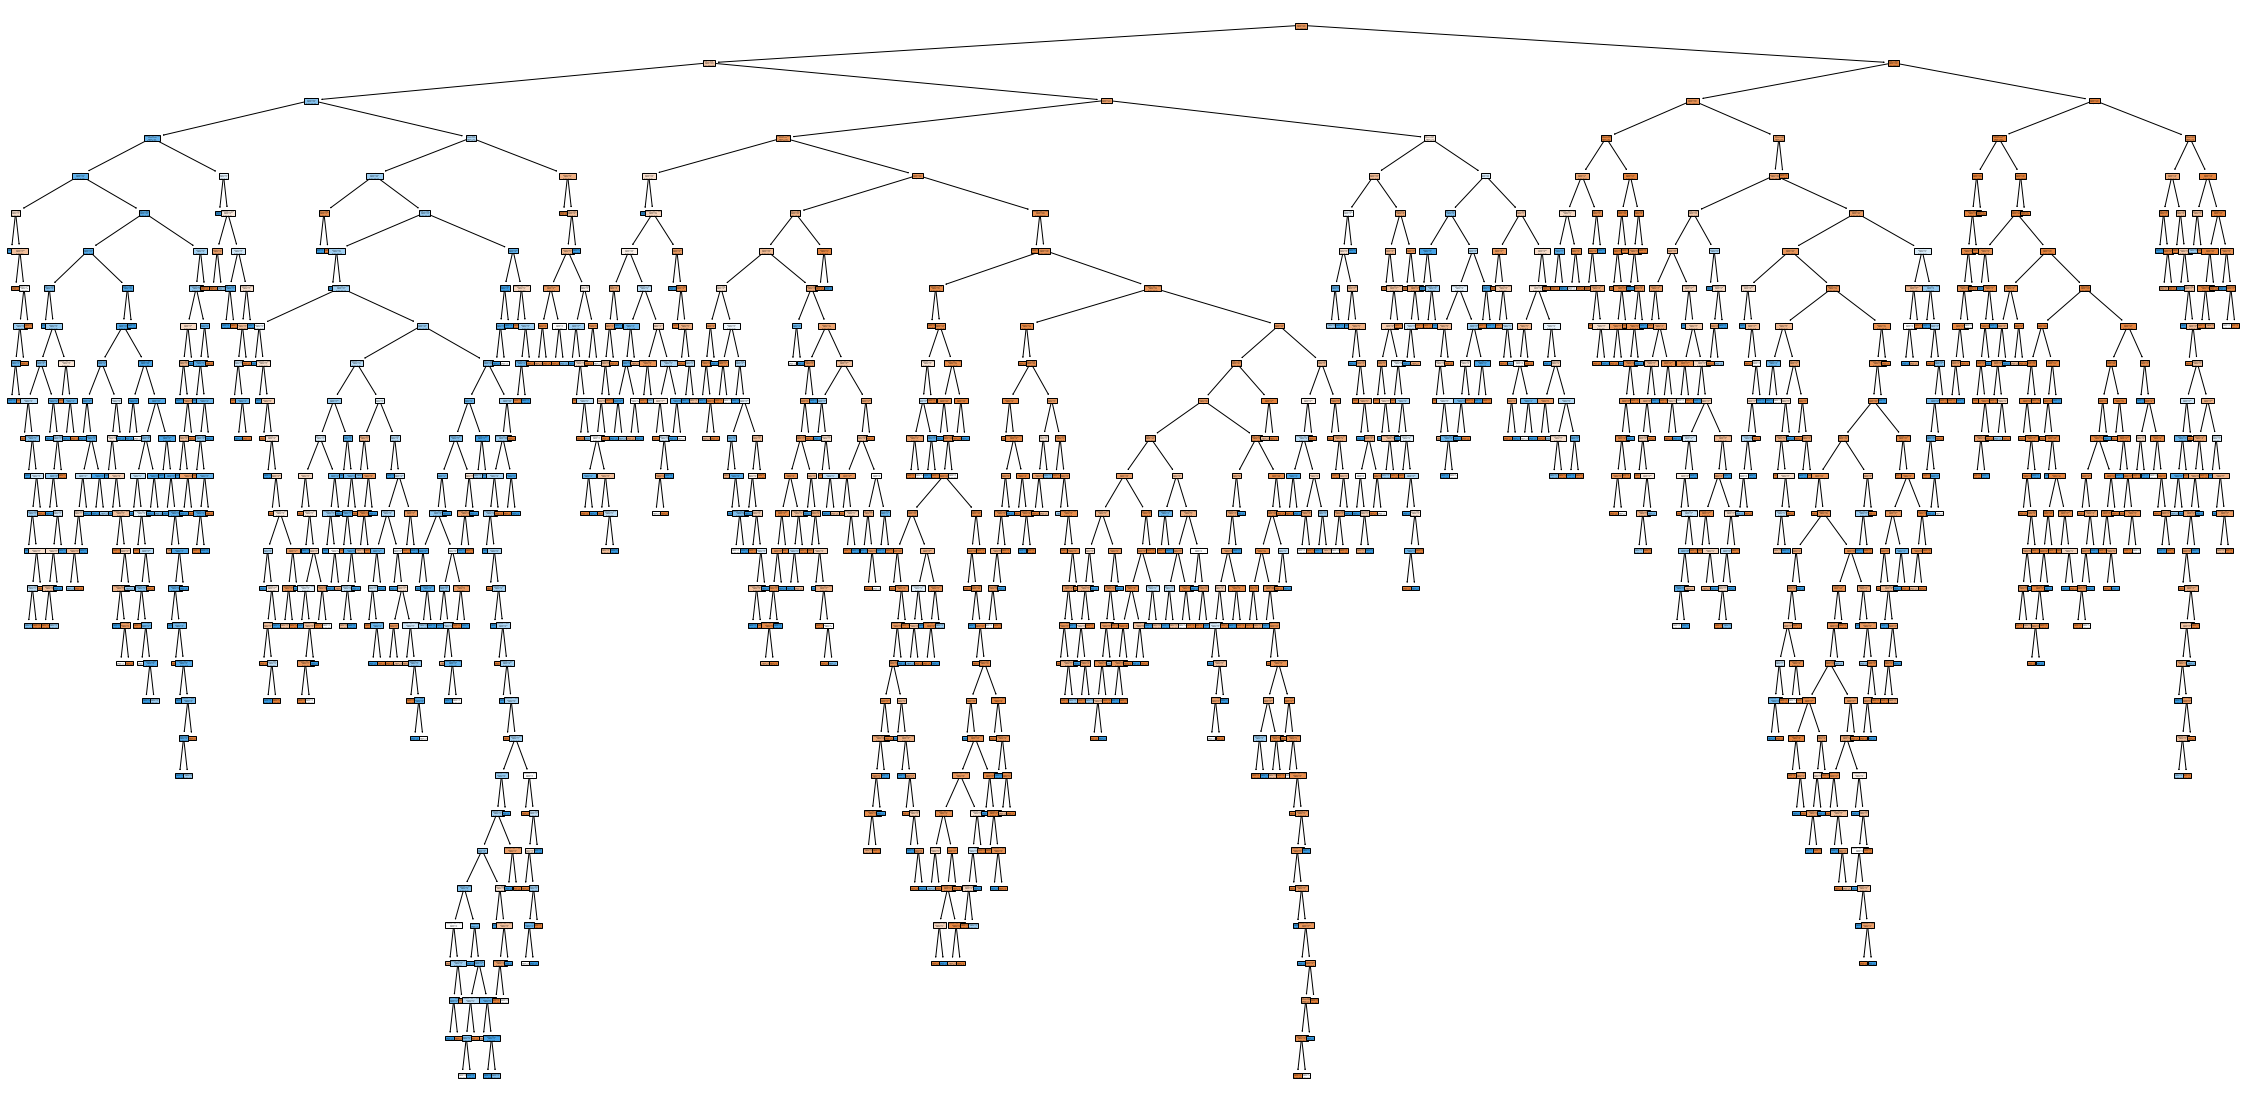

In [ ]:
from sklearn import tree
randon_florest_credit = ['Atividade do Cliente', 'Idade', 'Renda', 
               'Rotativo Total', 'Fatura', 'Total transações', 'Taxa de utilização']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(40,20))
tree.plot_tree(arvore_credit, feature_names=randon_florest_credit,filled=True);